In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

In [2]:
import math

def return_dict_summary_fixed(benchmark_name="cg", fixed="class"):
    if (fixed == "class"):
        fixed_ = return_fixed_class(BenchMark=benchmark_name)
    else:
        fixed_ = return_fixed_process(BenchMark=benchmark_name)
    summary_fixed_ = pd.concat(fixed_ , axis=1)
    columns = summary_fixed_.columns.to_numpy()
    index = summary_fixed_.index.to_numpy()
    if(fixed == "class"):
        dict_summary_fixed_ = {"processes":columns}
    else:
        dict_summary_fixed_ = {"class":columns}
    for index_name in index:
        dict_summary_fixed_[index_name] = summary_fixed_.T[index_name].to_numpy()
    return dict_summary_fixed_

def return_non_NaN_list(target_list):
    for i in range(len(target_list)):
        if (math.isnan(target_list[i])):
            target_list[i] = 0
    return target_list

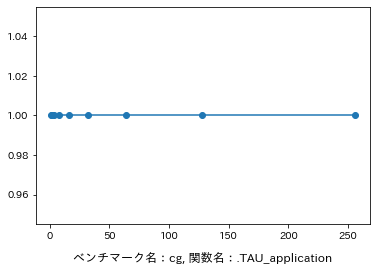

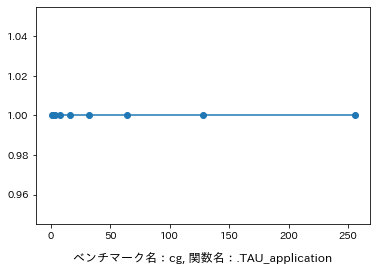

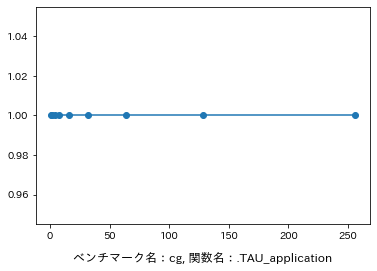

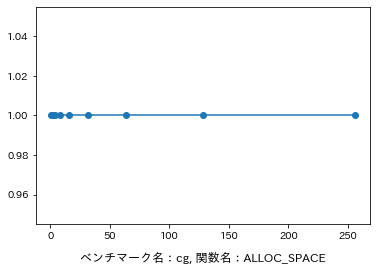

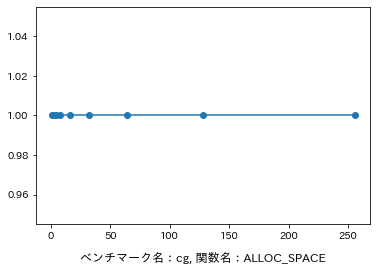

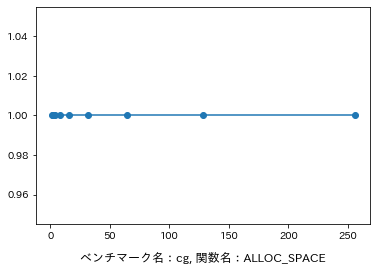

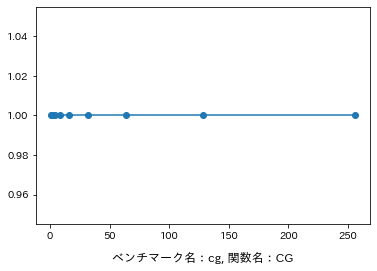

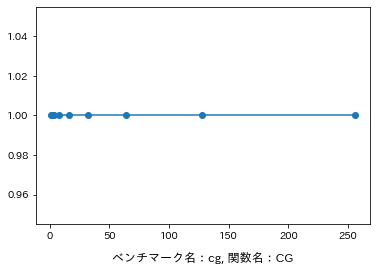

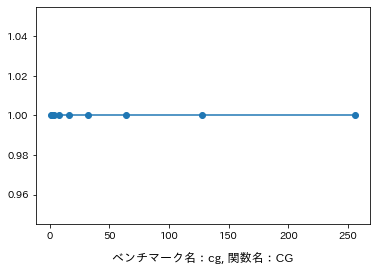

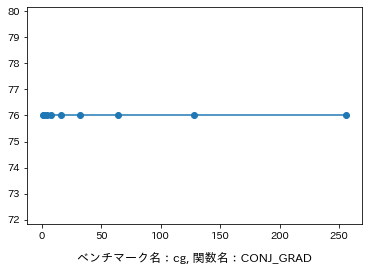

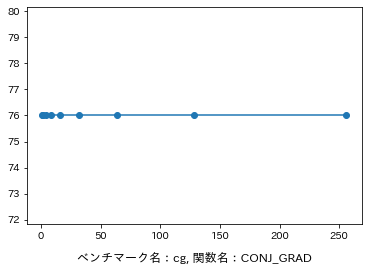

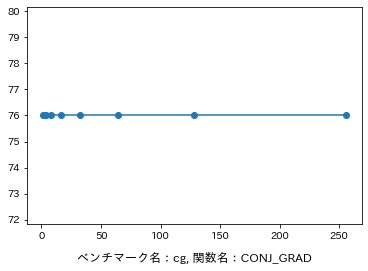

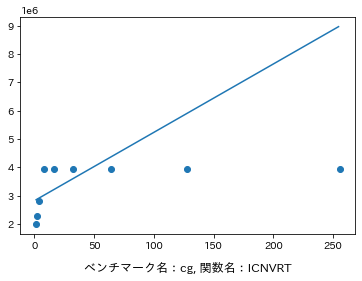

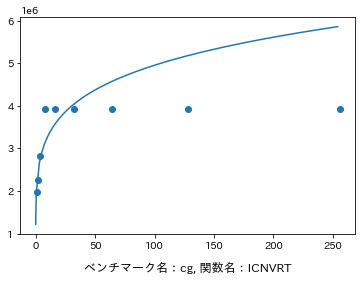

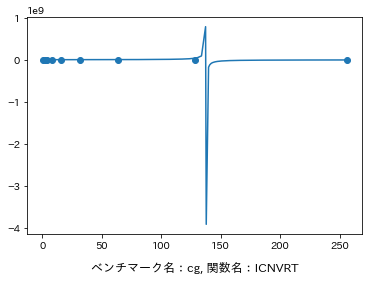

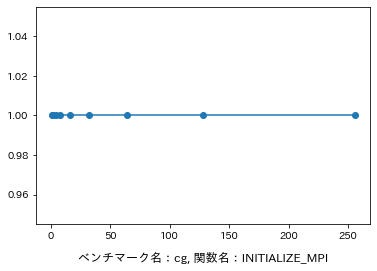

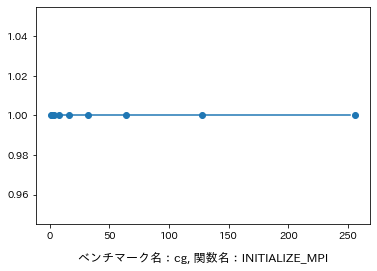

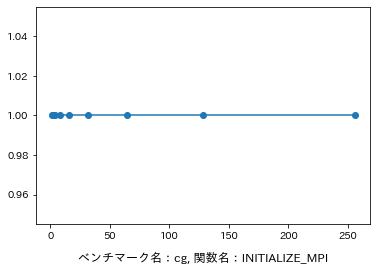

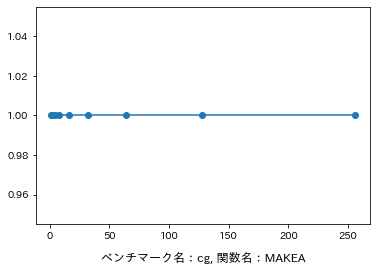

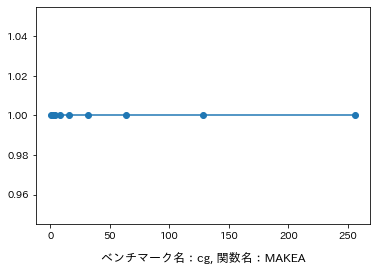

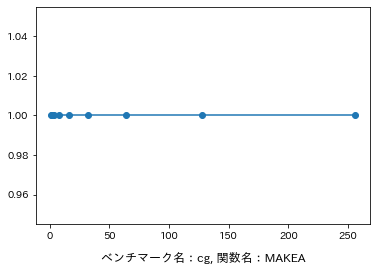

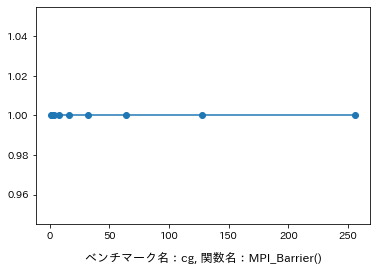

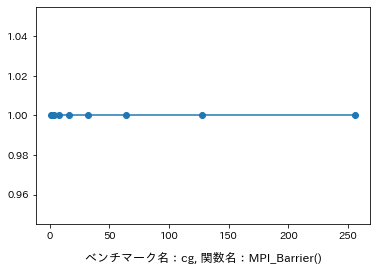

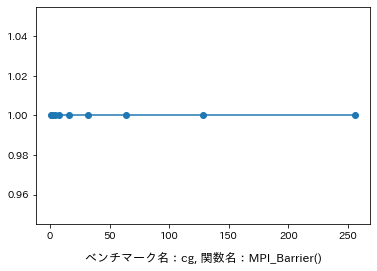

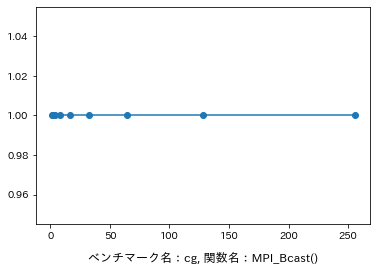

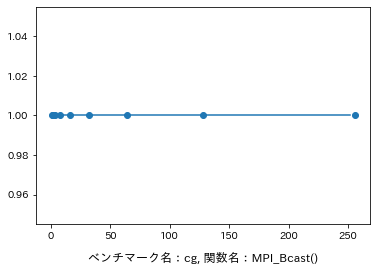

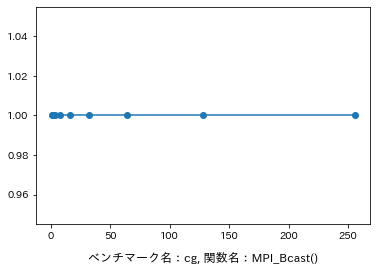

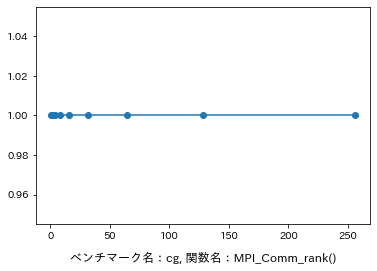

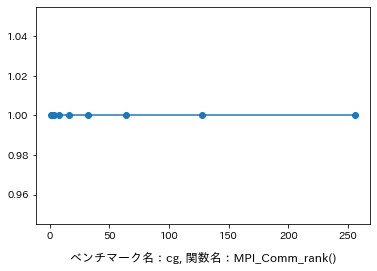

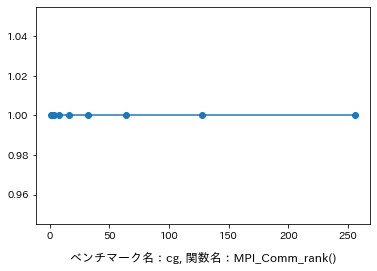

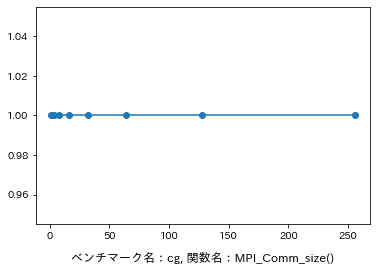

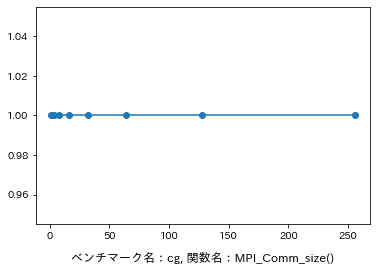

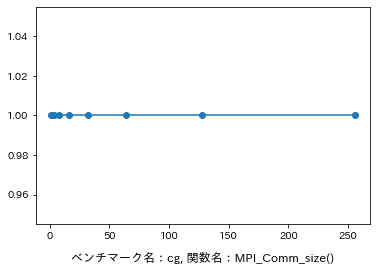

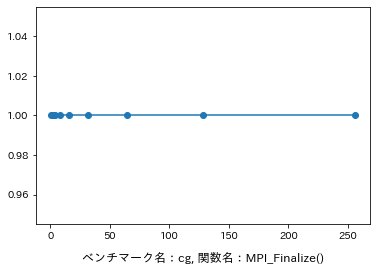

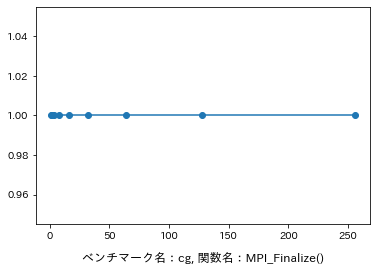

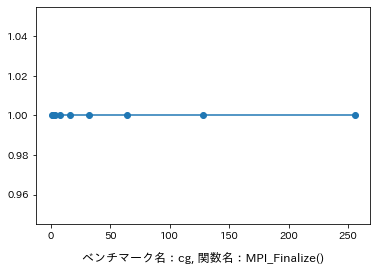

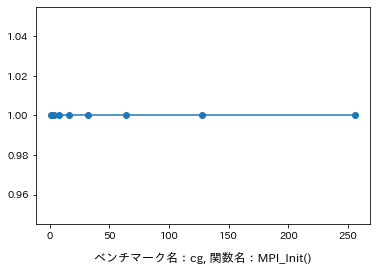

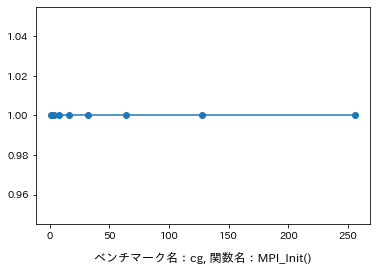

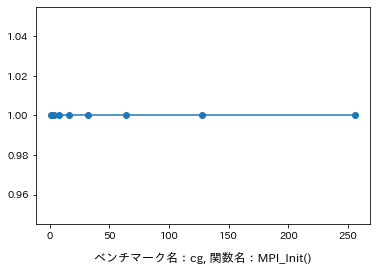

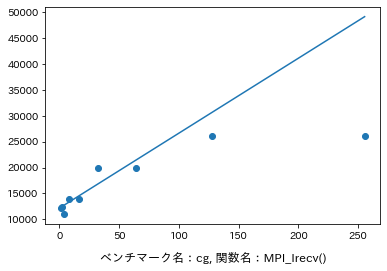

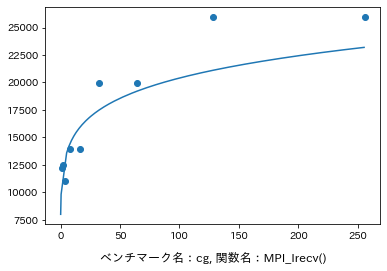

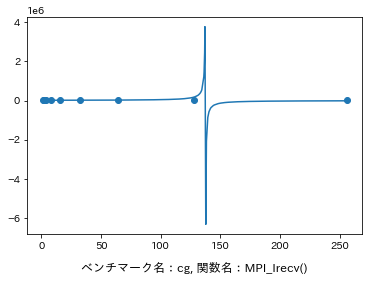

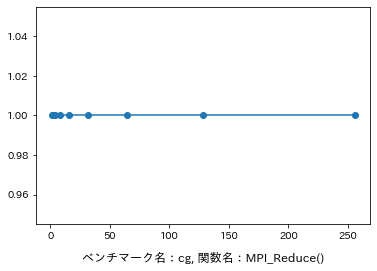

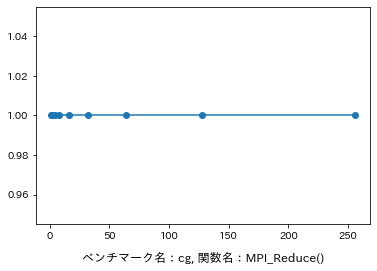

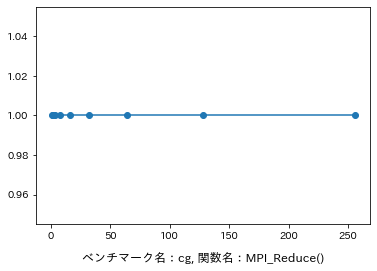

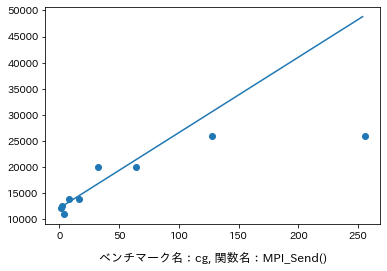

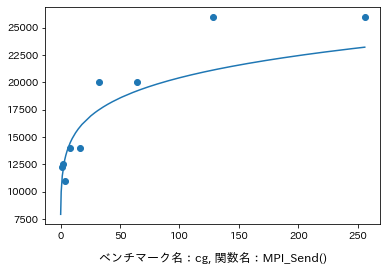

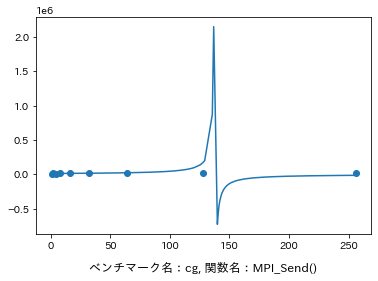

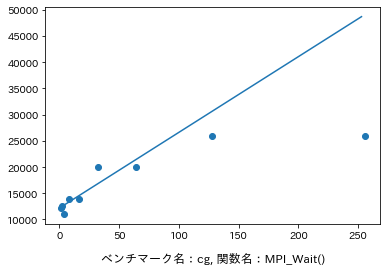

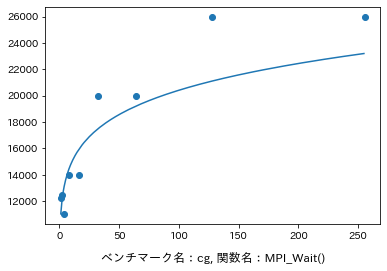

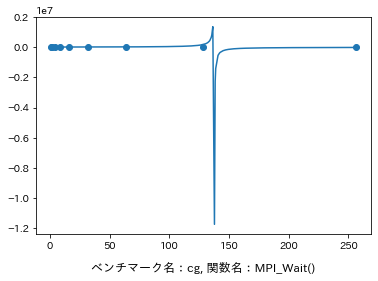

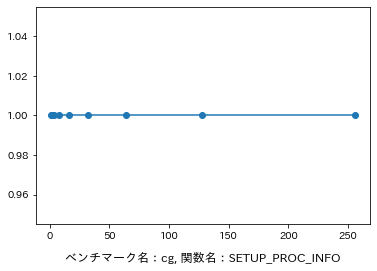

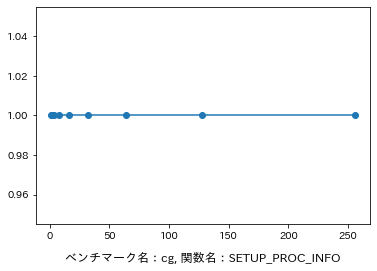

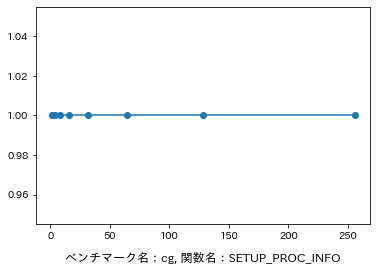

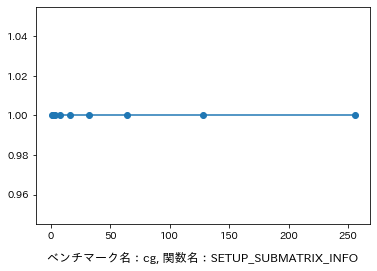

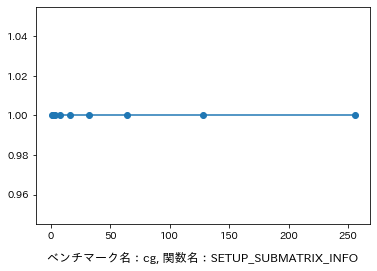

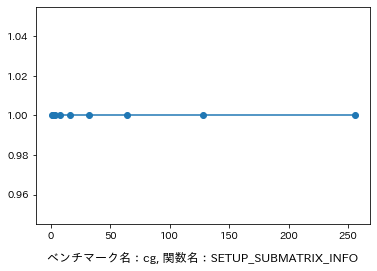

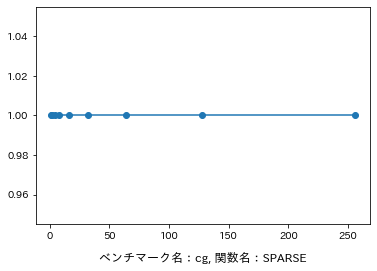

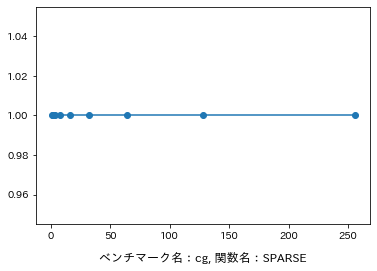

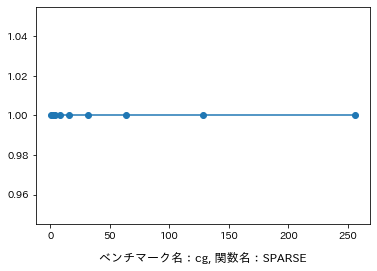

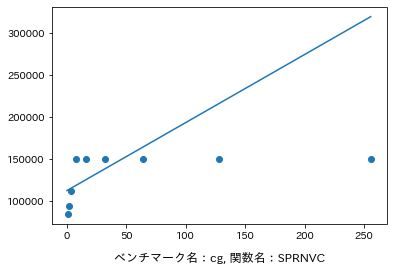

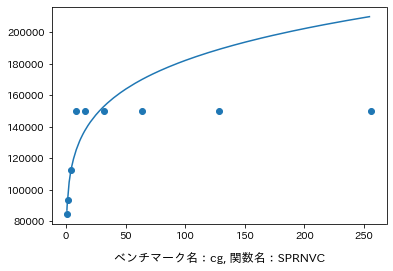

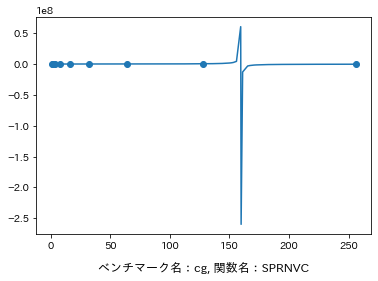

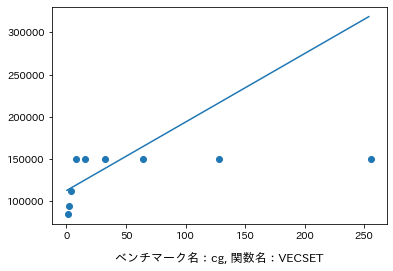

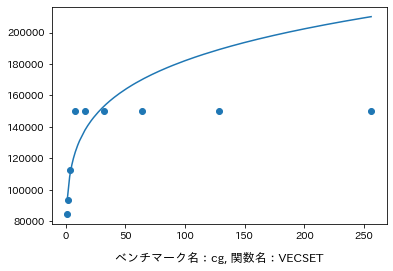

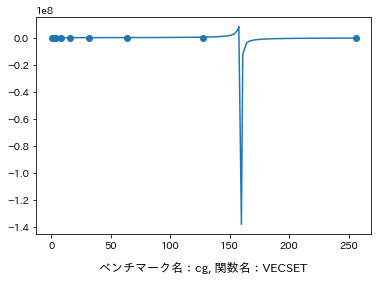

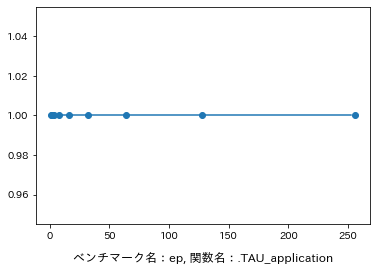

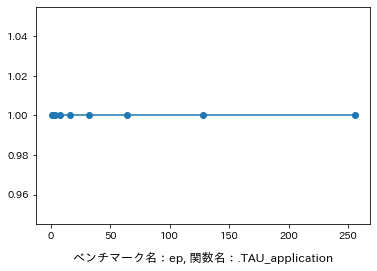

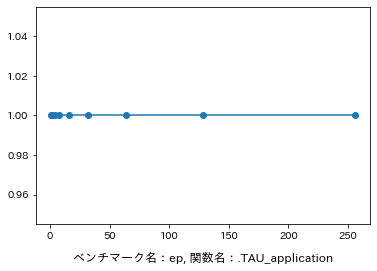

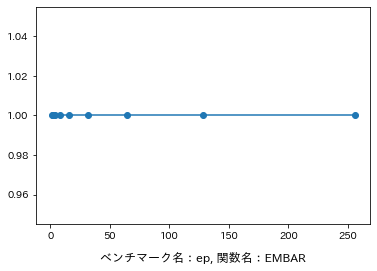

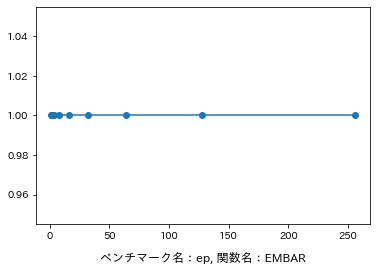

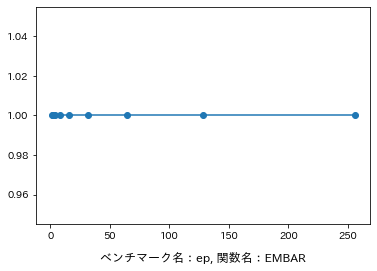

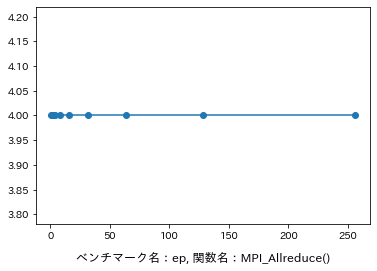

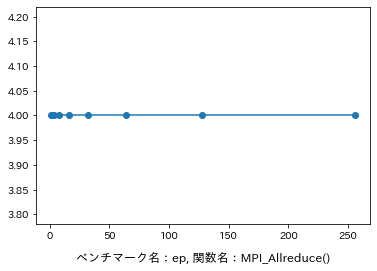

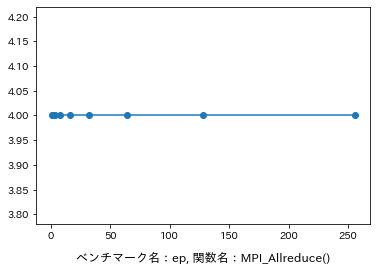

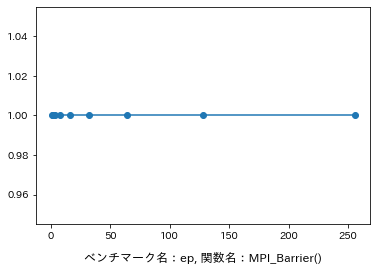

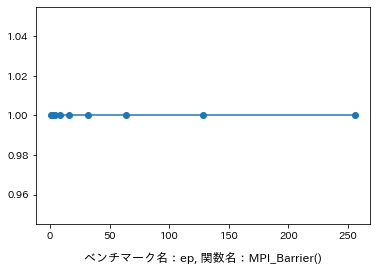

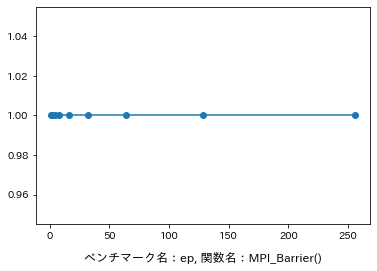

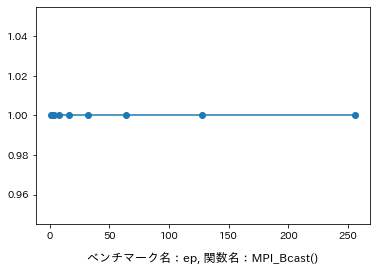

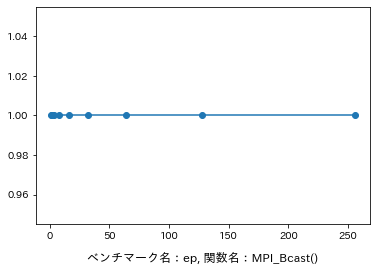

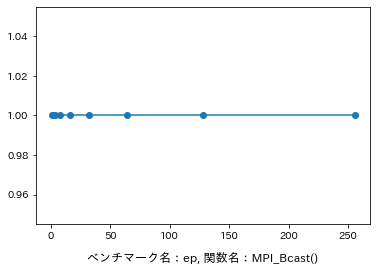

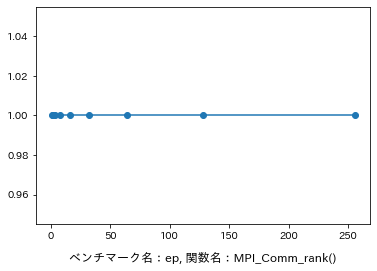

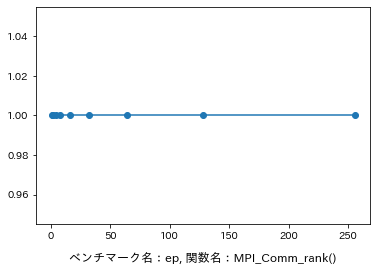

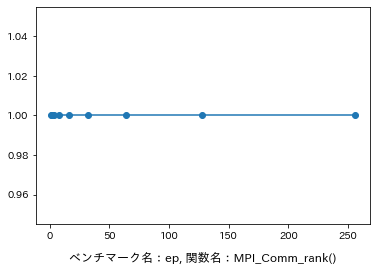

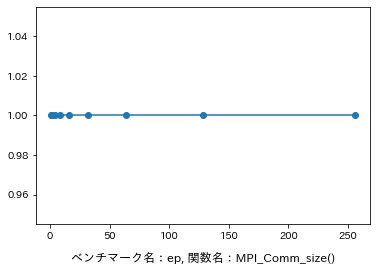

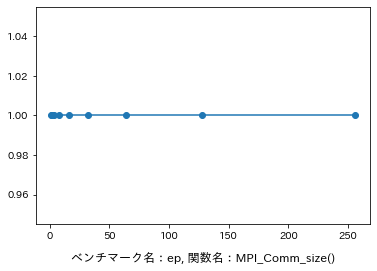

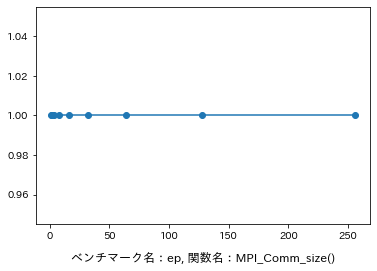

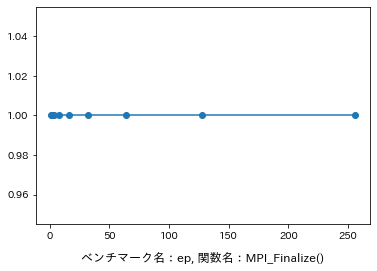

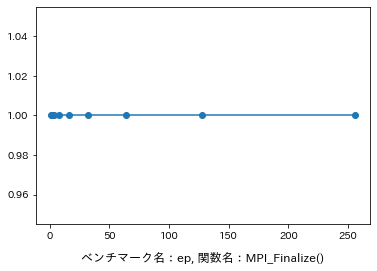

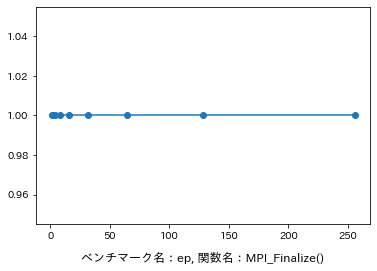

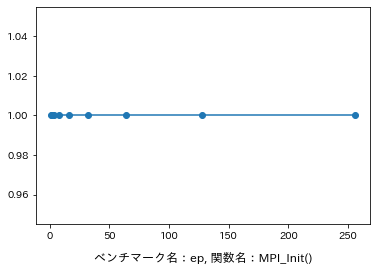

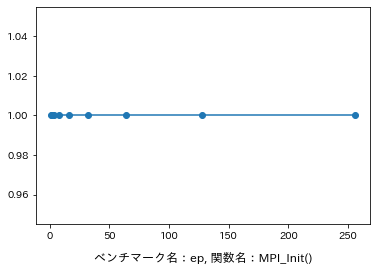

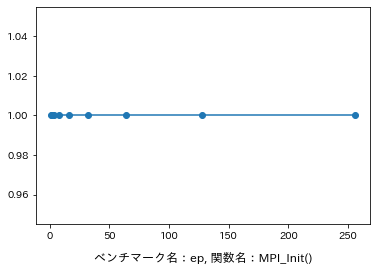

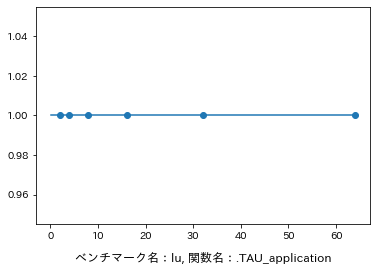

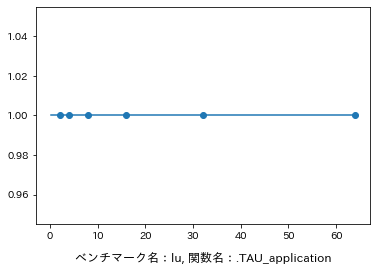

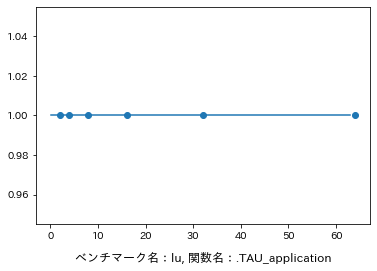

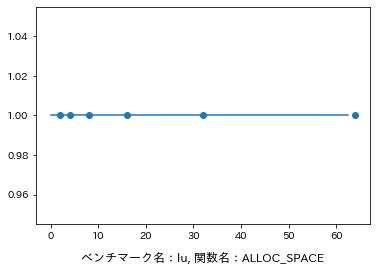

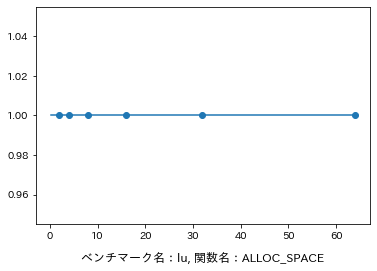

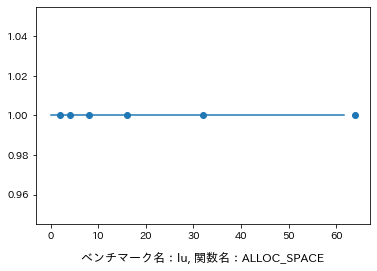

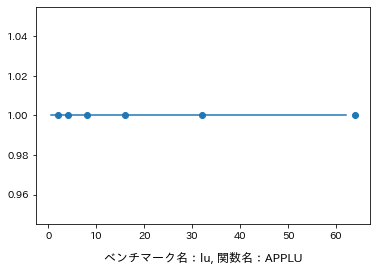

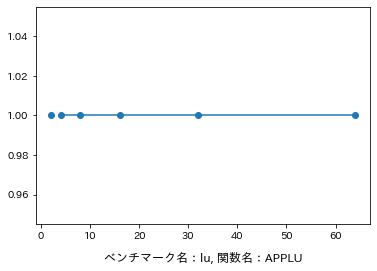

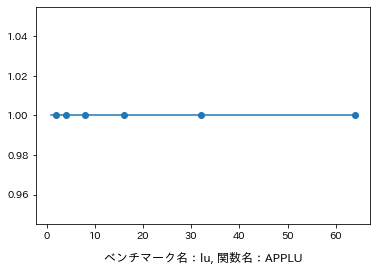

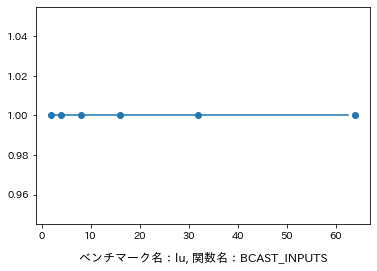

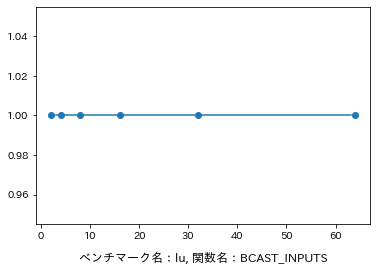

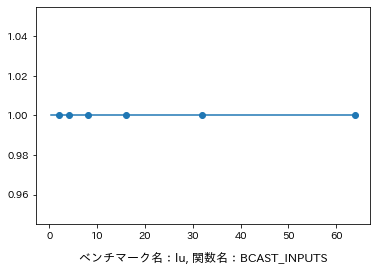

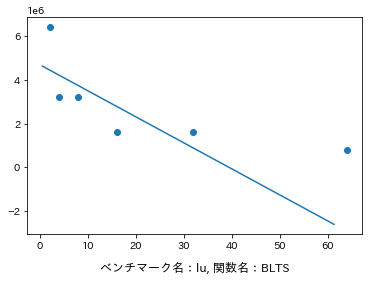

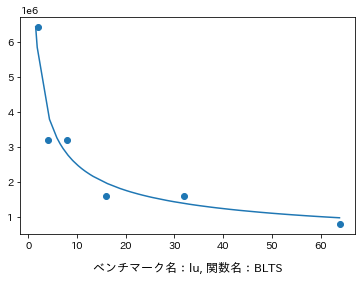

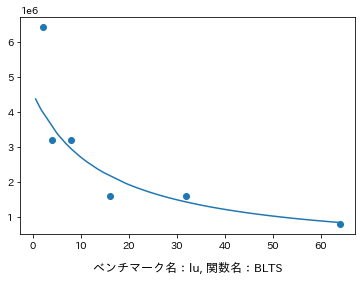

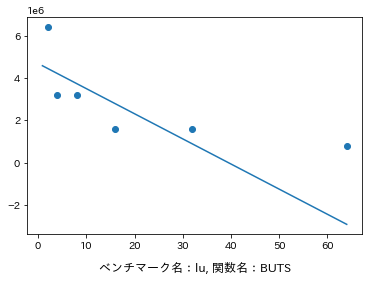

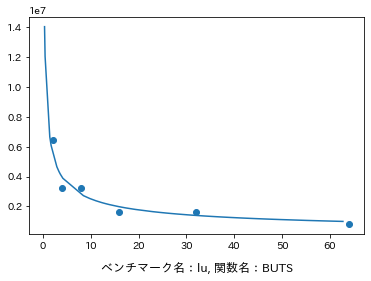

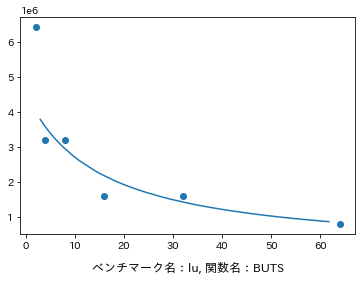

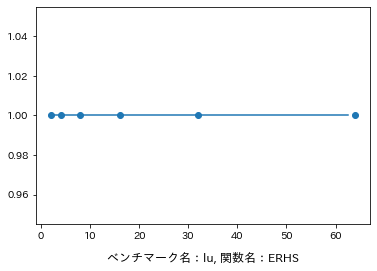

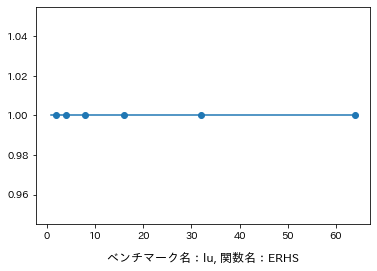

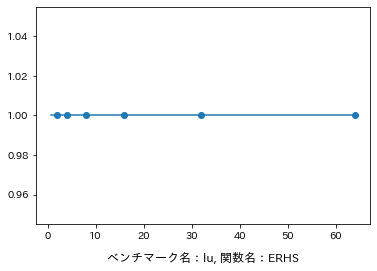

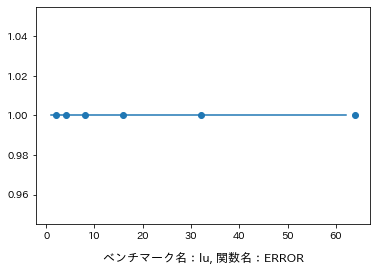

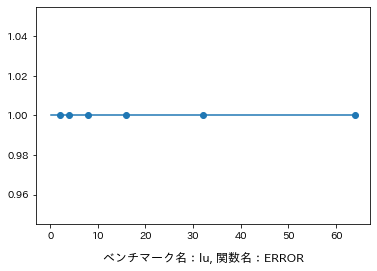

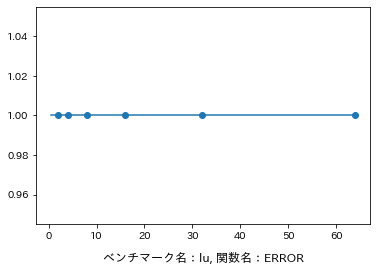

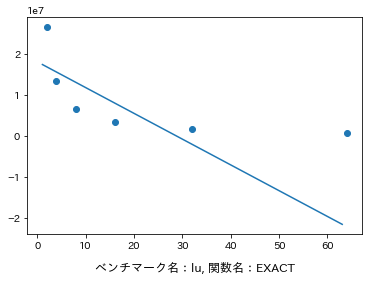

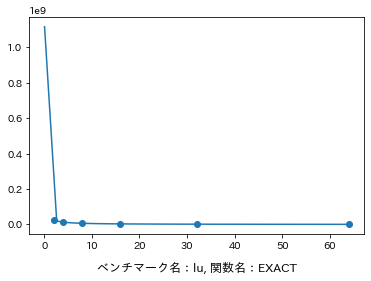

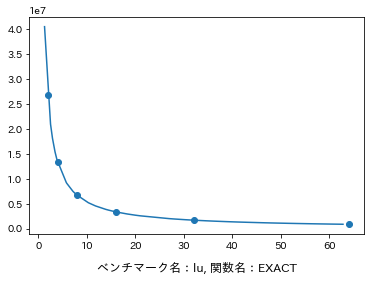

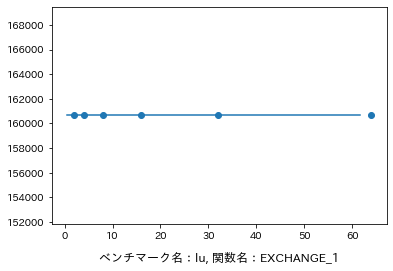

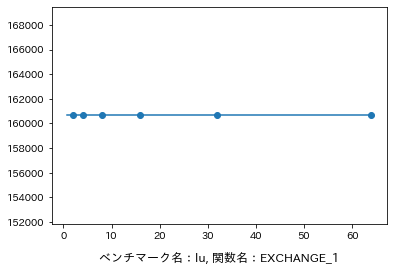

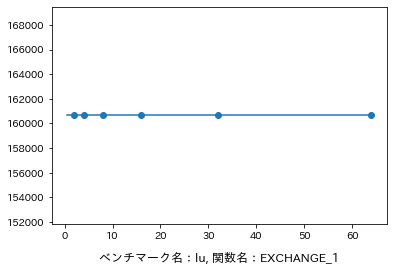

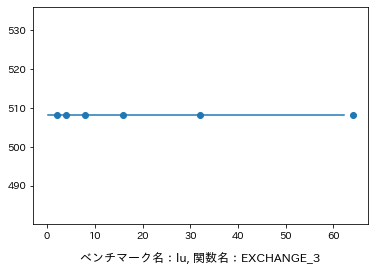

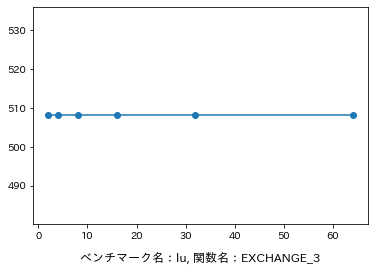

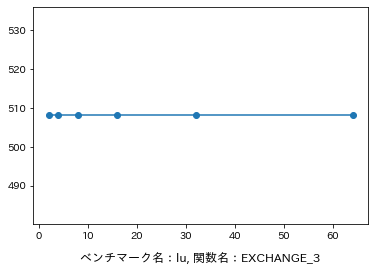

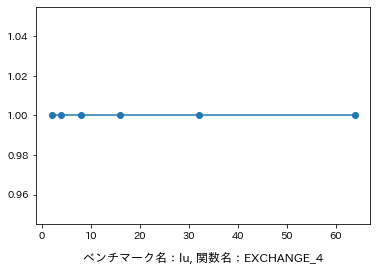

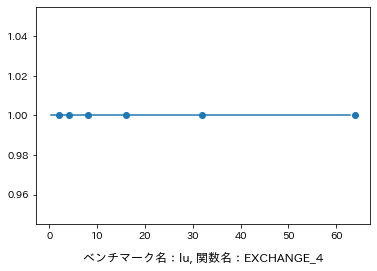

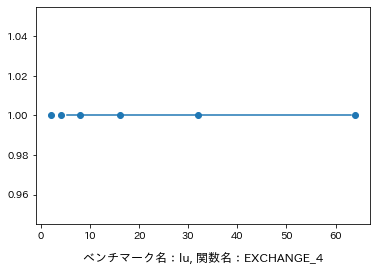

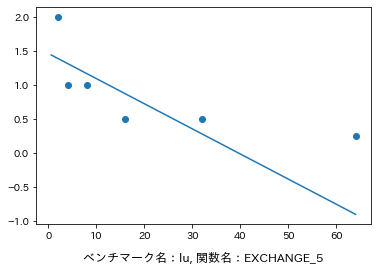

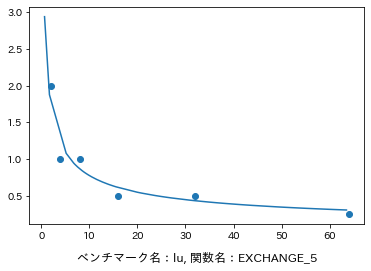

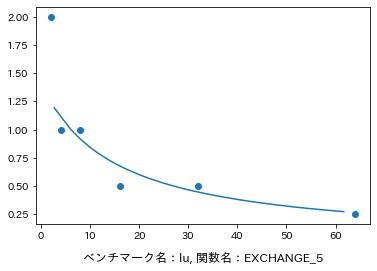

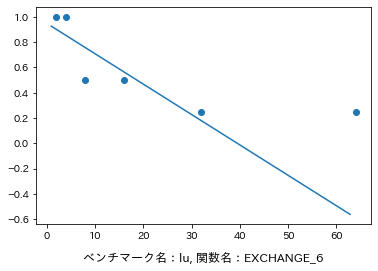

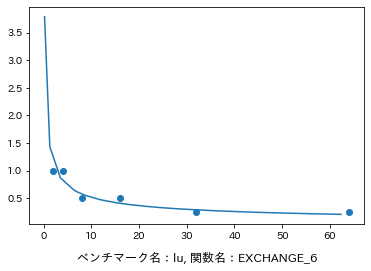

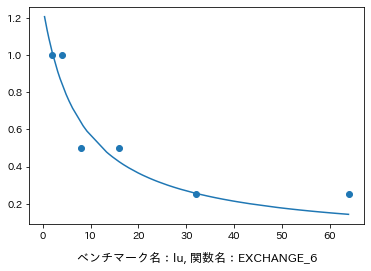

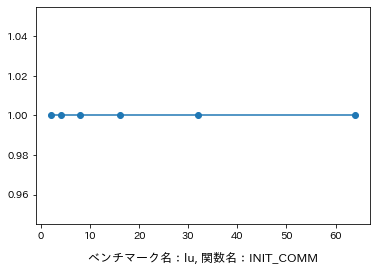

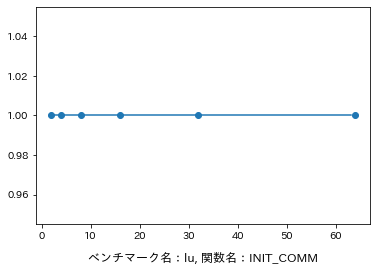

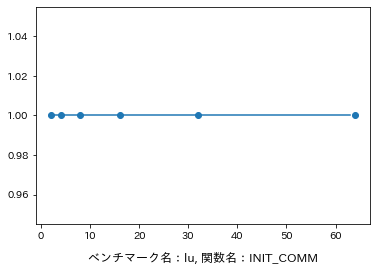

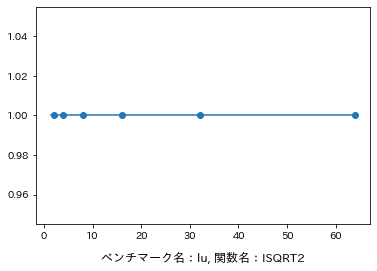

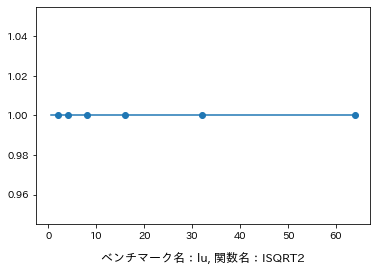

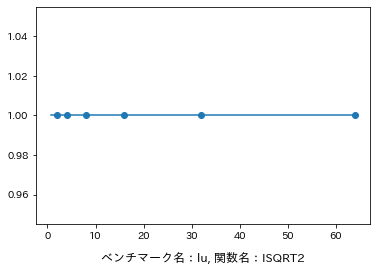

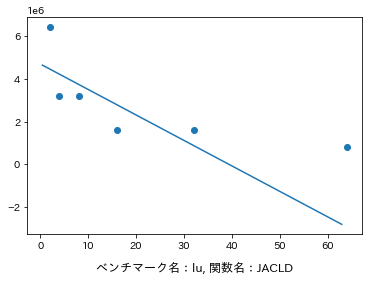

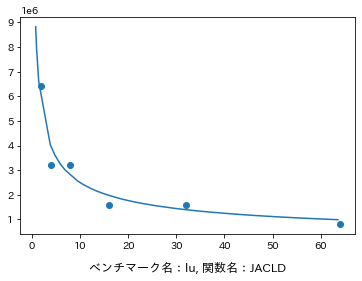

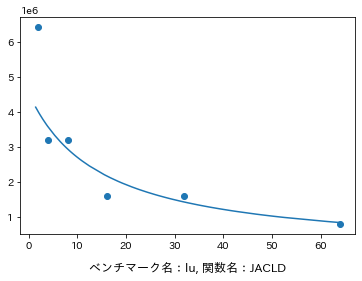

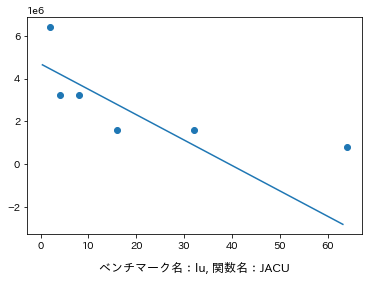

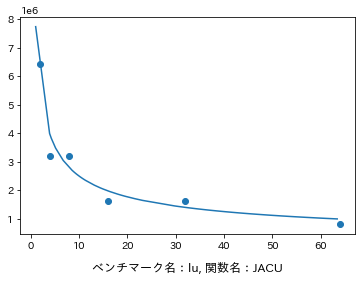

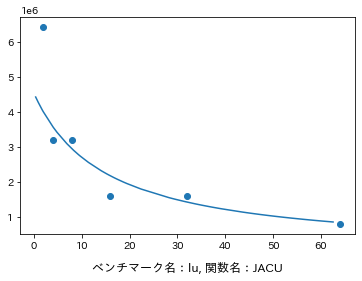

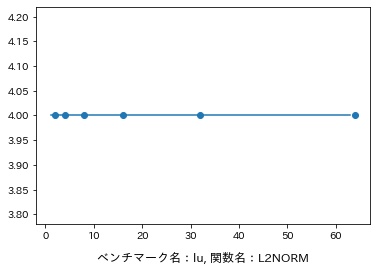

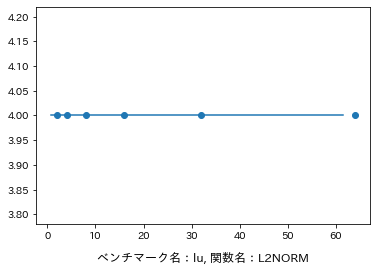

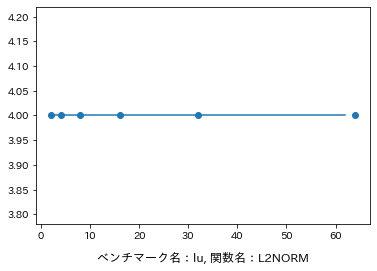

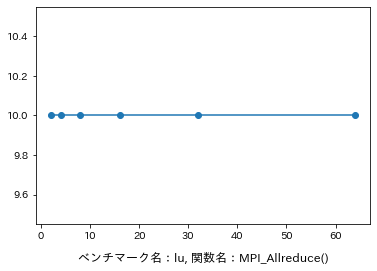

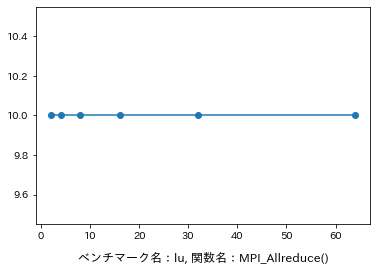

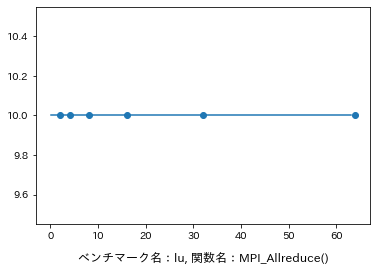

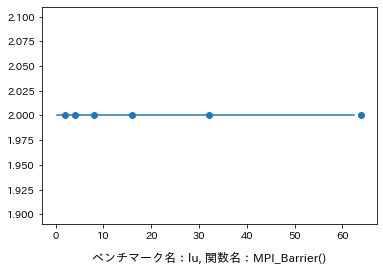

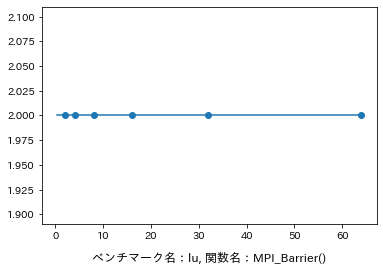

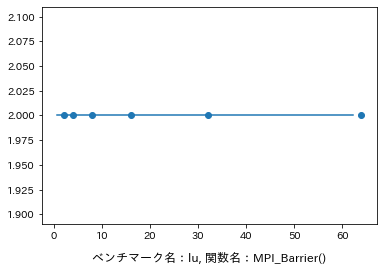

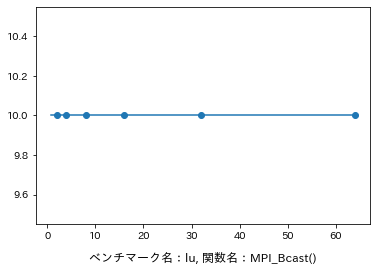

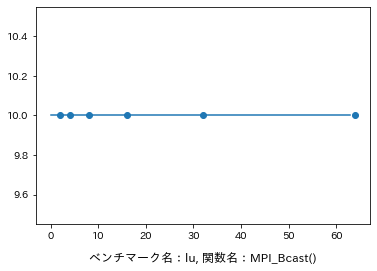

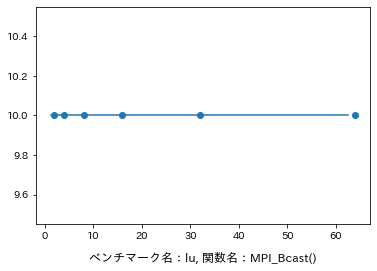

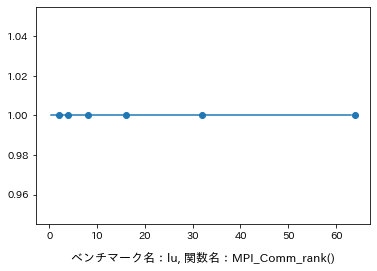

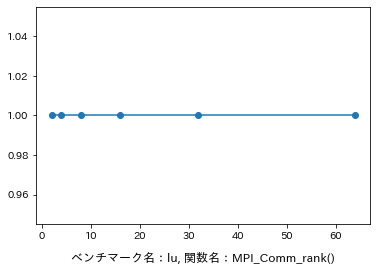

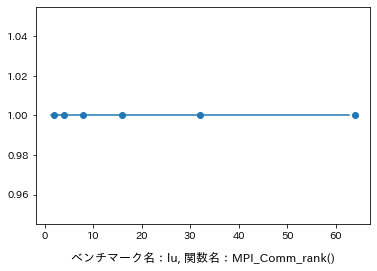

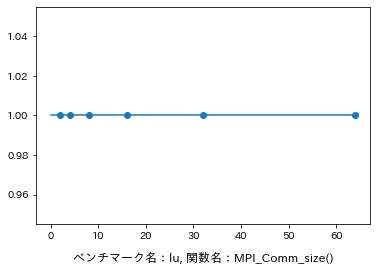

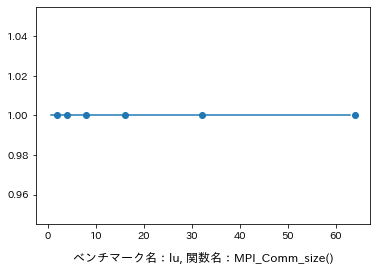

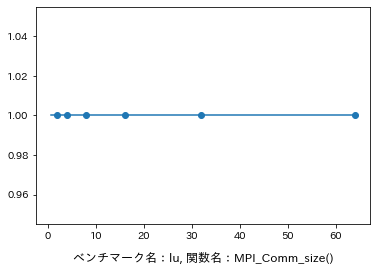

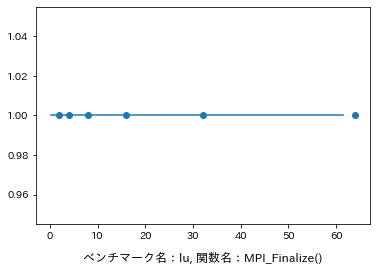

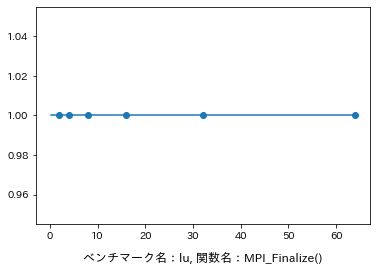

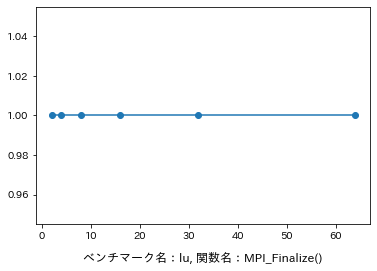

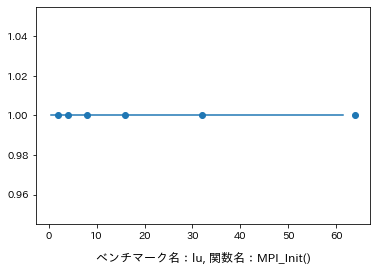

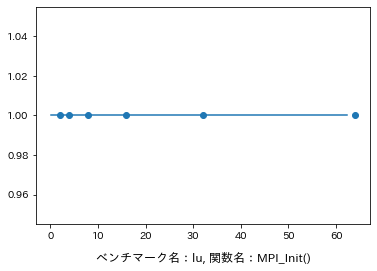

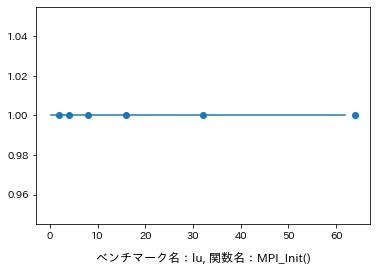

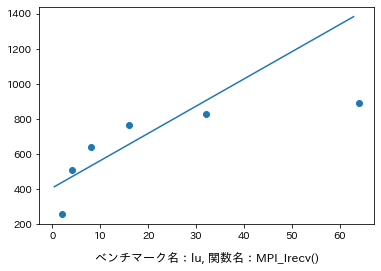

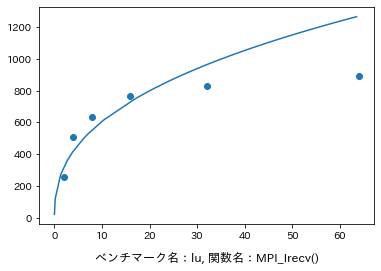

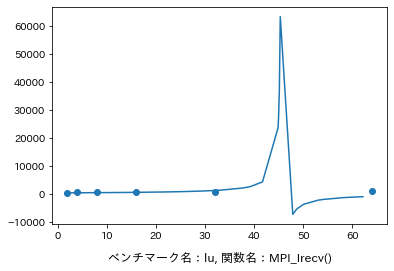

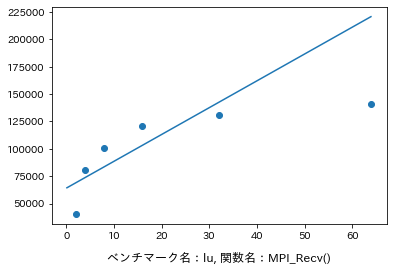

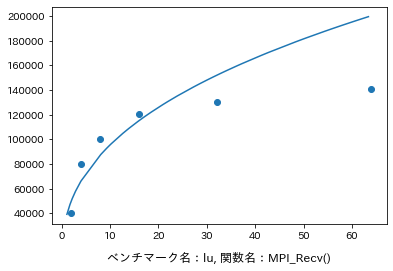

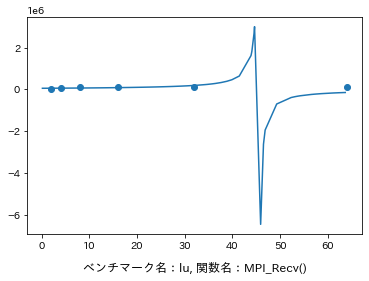

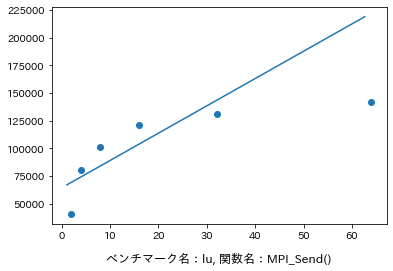

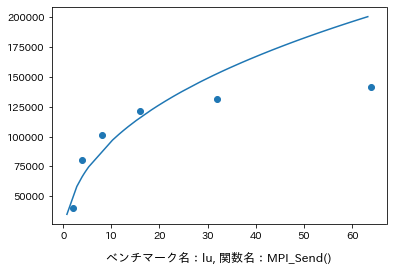

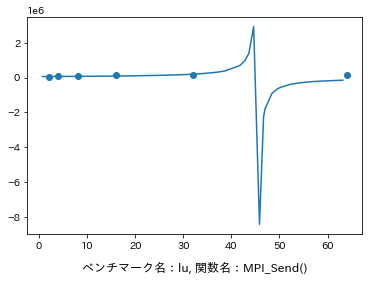

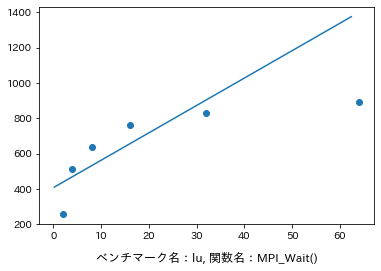

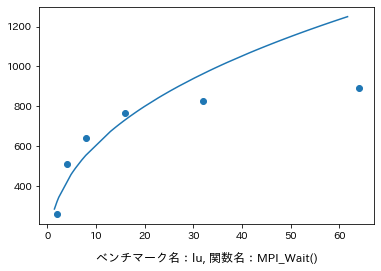

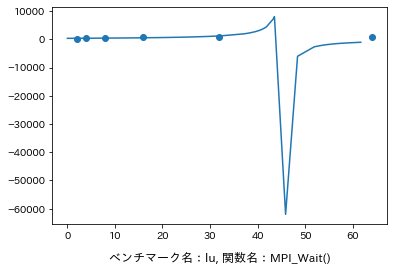

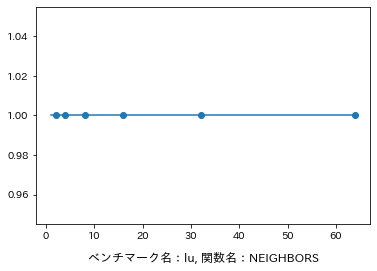

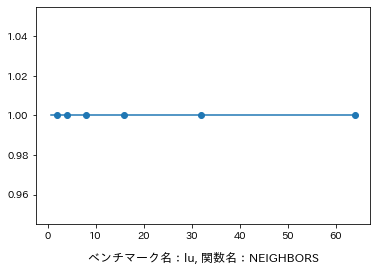

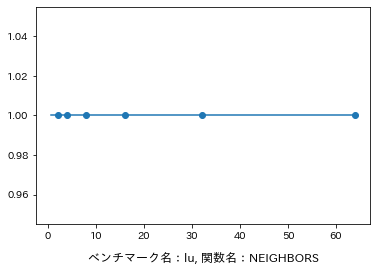

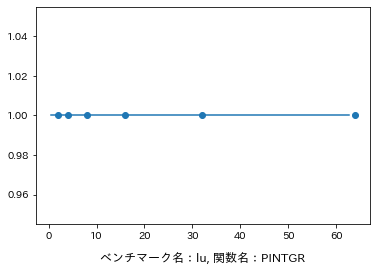

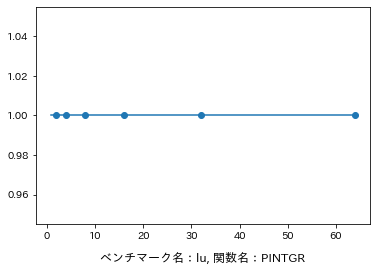

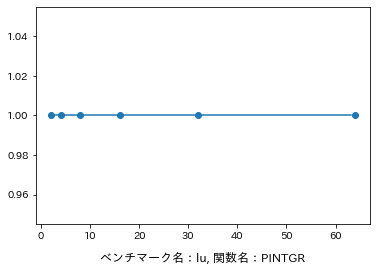

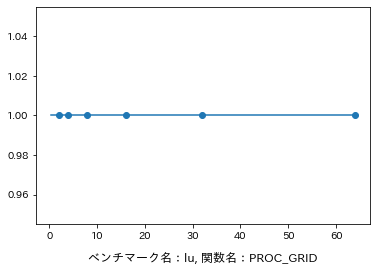

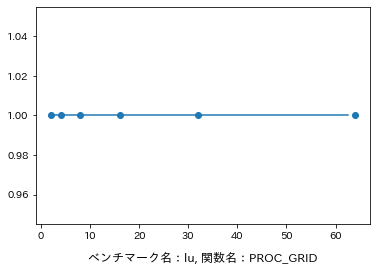

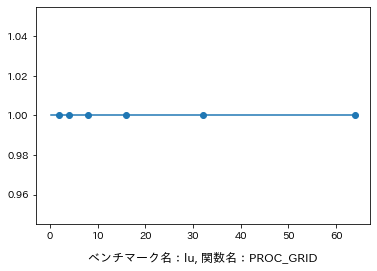

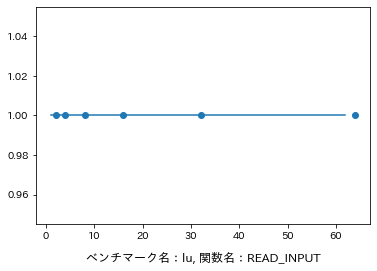

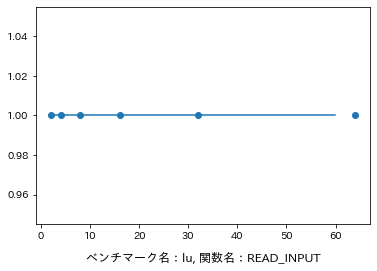

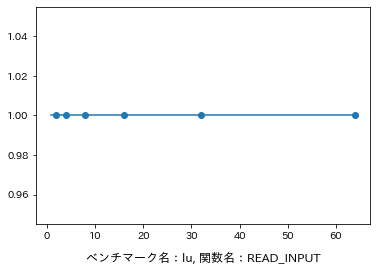

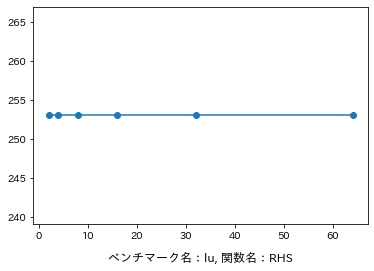

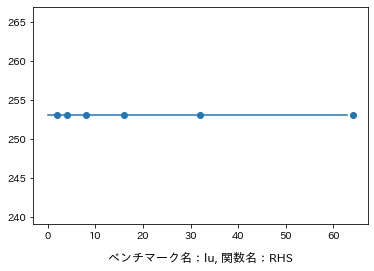

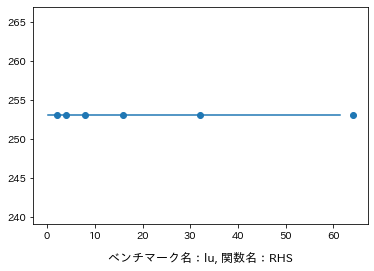

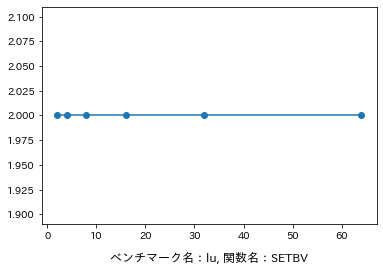

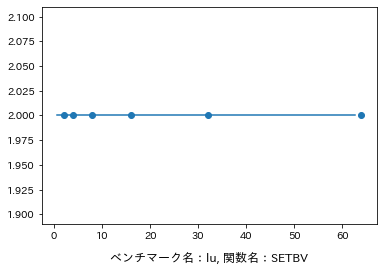

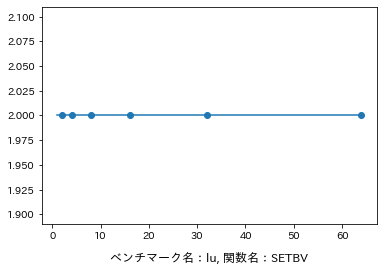

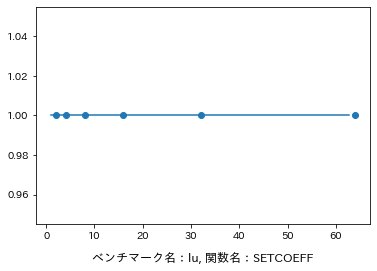

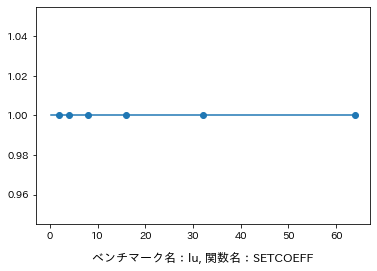

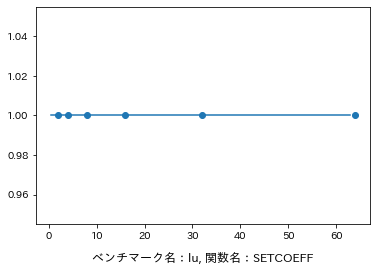

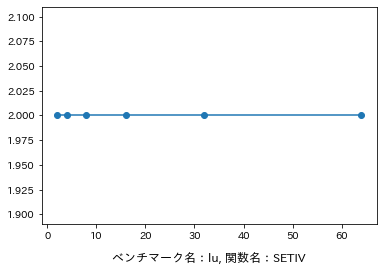

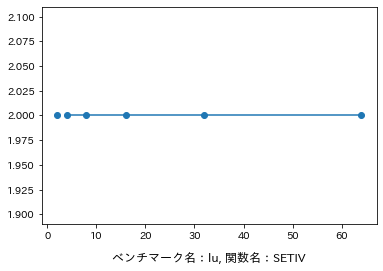

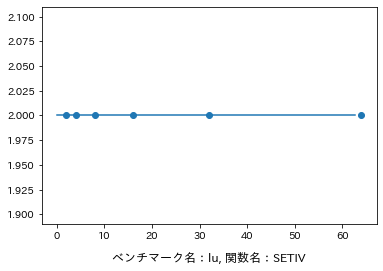

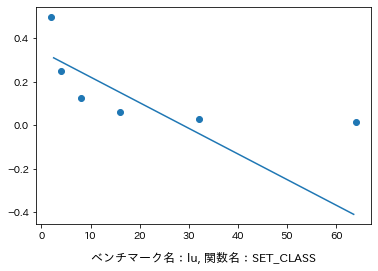

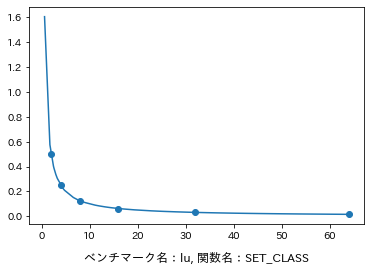

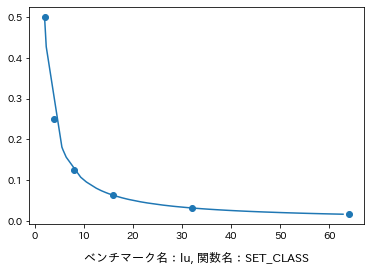

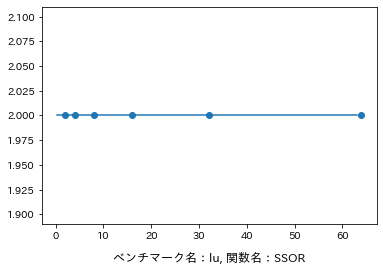

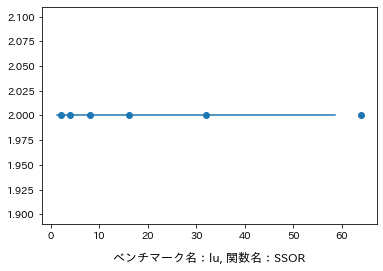

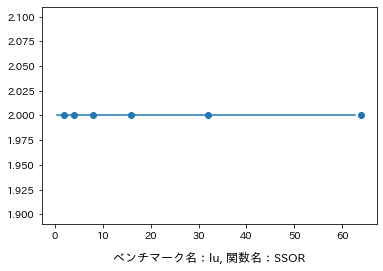

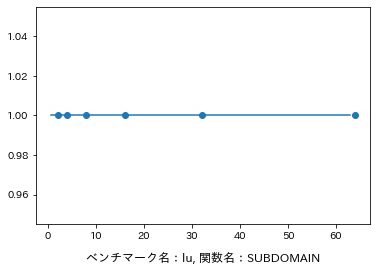

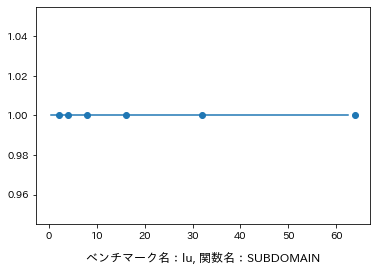

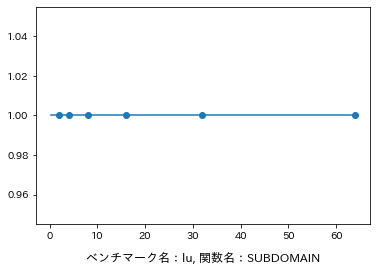

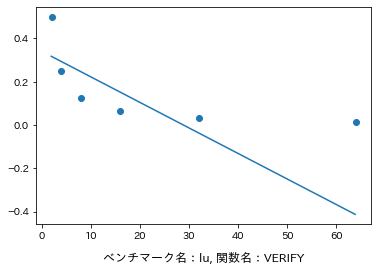

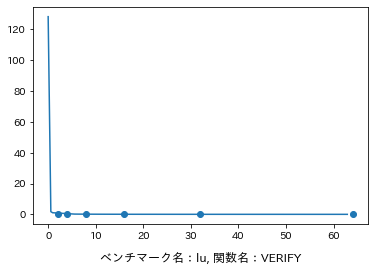

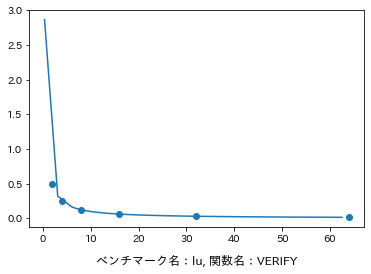

In [3]:
dict_ScoreTable = {}

for benchmark in benchmarks:
    list_ScoreTable = []
    # 以下の「benchmark == "XXX"」はNaNがデータとして存在するものを飛ばすために存在
    if(benchmark == "bt"):
        continue
    elif(benchmark == "ft"):
        continue
    elif(benchmark == "is"):
        continue
    elif(benchmark == "mg"):
        continue
    elif(benchmark == "sp"):
        continue
    elif(benchmark == "ft"):
        continue
    dict_summary_fixed_class = return_dict_summary_fixed(benchmark_name=benchmark, fixed="class")
    raw_x = dict_summary_fixed_class["processes"]
#     print(f"raw_x : {raw_x}, benchmark : {benchmark}")
    for content in dict_summary_fixed_class:
        if(content == "processes"):
            continue
        raw_y = return_non_NaN_list(dict_summary_fixed_class[content])
#         print(f"raw_y(={content}) : {raw_y}")
        # 線形モデル
        model_lin = ModelLin(raw_x, raw_y, benchmark, content)
        model_lin.calc_lr()
        model_lin.calc_r2_score()
        model_lin.plot_graph()
        model_lin.calc_mae_score()
        model_lin.calc_mse_score()
        model_lin.calc_rmse_score()
        # logモデル
        model_log10 = ModelLog10(raw_x, raw_y, benchmark, content)
        model_log10.calc_lr()
        model_log10.calc_r2_score()
        model_log10.plot_graph()
        model_log10.calc_mae_score()
        model_log10.calc_mse_score()
        model_log10.calc_rmse_score()
        # 反比例モデル
        model_ip = ModelIP(raw_x, raw_y, benchmark, content)
        model_ip.calc_lr()
        model_ip.calc_r2_score()
        model_ip.plot_graph()
        model_ip.calc_mae_score()
        model_ip.calc_mse_score()
        model_ip.calc_rmse_score()
        
        list_ScoreTable.append([content, model_lin.r2_score, model_log10.r2_score, model_ip.r2_score, 
                                model_lin.mae_score, model_log10.mae_score, model_ip.mae_score, 
                                model_lin.mse_score, model_log10.mse_score, model_ip.mse_score, 
                                model_lin.rmse_score, model_log10.rmse_score, model_ip.rmse_score])
    
    df_ScoreTable = pd.DataFrame(list_ScoreTable)
    df_ScoreTable.columns = ["", "x r2", "logx r2", "1/x r2", 
                             "x mae", "logx mae", "1/x mae", 
                             "x mse", "logx mse", "1/x mse", 
                             "x rmse", "logx rmse", "1/x rmse"]
    df_ScoreTable.set_index("",inplace=True)
    df_ScoreTable.to_csv("./tmp_GenerateScoreTable/"+benchmark+".csv")
#     print("\n")